In [1]:
import pandas as pd

# Cargar los datos
file_path = 'datasets/games.csv'
games_data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para entender la estructura de los datos
games_data.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
# Paso 1: Reemplazar los nombres de las columnas (ponerlos en minúsculas)
games_data.columns = games_data.columns.str.lower()

# Paso 2: Convertir los datos a los tipos necesarios
# Convertir 'year_of_release' a int (ignorando NaN por ahora)
games_data['year_of_release'] = games_data['year_of_release'].fillna(0).astype(int)

# Identificar y manejar la abreviatura TBD en 'user_score'
games_data['user_score'] = games_data['user_score'].replace('tbd', None)

# Convertir 'user_score' a float
games_data['user_score'] = games_data['user_score'].astype(float)

# Paso 3 y 4: Tratar los valores ausentes y manejar TBD
# Los valores ausentes en 'critic_score', 'user_score', y 'rating' serán dejados como están por ahora,
# considerando que la imputación requeriría un análisis más detallado.

# Paso 5: Calcular las ventas totales para cada juego
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar las primeras filas y los tipos de datos para verificar los cambios
games_data.head(), games_data.dtypes


(                       name platform  year_of_release         genre  na_sales  \
 0                Wii Sports      Wii             2006        Sports     41.36   
 1         Super Mario Bros.      NES             1985      Platform     29.08   
 2            Mario Kart Wii      Wii             2008        Racing     15.68   
 3         Wii Sports Resort      Wii             2009        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
 
    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
 0     28.96      3.77         8.45          76.0         8.0      E   
 1      3.58      6.81         0.77           NaN         NaN    NaN   
 2     12.76      3.79         3.29          82.0         8.3      E   
 3     10.93      3.28         2.95          80.0         8.0      E   
 4      8.89     10.22         1.00           NaN         NaN    NaN   
 
    total_sales  
 0        82.54  
 1        40.24  
 2        35.52  


In [3]:
# Revertir 'year_of_release' a su estado original para eliminar valores NaN correctamente
games_data['year_of_release'] = pd.read_csv(file_path)['Year_of_Release']

# Eliminar filas donde 'year_of_release' es NaN
games_data_cleaned = games_data.dropna(subset=['year_of_release'])

# Convertir 'year_of_release' a int nuevamente, ahora que los NaN han sido eliminados
games_data_cleaned['year_of_release'] = games_data_cleaned['year_of_release'].astype(int)

# Verificar los cambios realizados
games_data_cleaned.head(), games_data_cleaned['year_of_release'].dtype


C:\Users\ejfra\AppData\Local\Temp\ipykernel_21944\379150625.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data_cleaned['year_of_release'] = games_data_cleaned['year_of_release'].astype(int)


(                       name platform  year_of_release         genre  na_sales  \
 0                Wii Sports      Wii             2006        Sports     41.36   
 1         Super Mario Bros.      NES             1985      Platform     29.08   
 2            Mario Kart Wii      Wii             2008        Racing     15.68   
 3         Wii Sports Resort      Wii             2009        Sports     15.61   
 4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
 
    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
 0     28.96      3.77         8.45          76.0         8.0      E   
 1      3.58      6.81         0.77           NaN         NaN    NaN   
 2     12.76      3.79         3.29          82.0         8.3      E   
 3     10.93      3.28         2.95          80.0         8.0      E   
 4      8.89     10.22         1.00           NaN         NaN    NaN   
 
    total_sales  
 0        82.54  
 1        40.24  
 2        35.52  


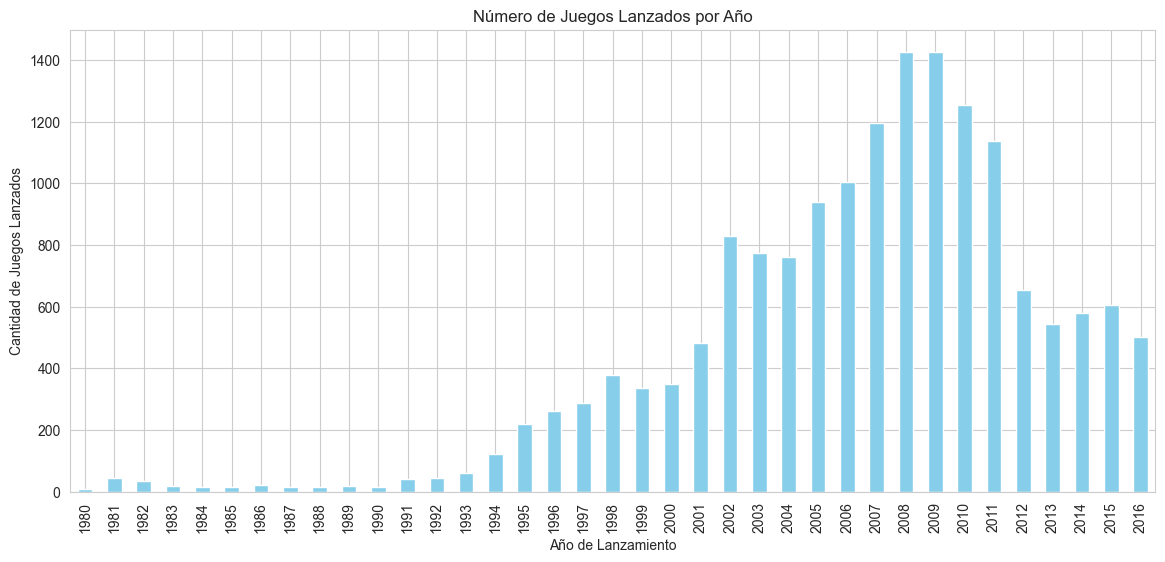

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de los gráficos
sns.set_style("whitegrid")

# Contar la cantidad de juegos lanzados por año
games_per_year = games_data_cleaned.groupby('year_of_release')['name'].count()

# Crear un gráfico de barras para visualizar los juegos lanzados por año
plt.figure(figsize=(14, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()


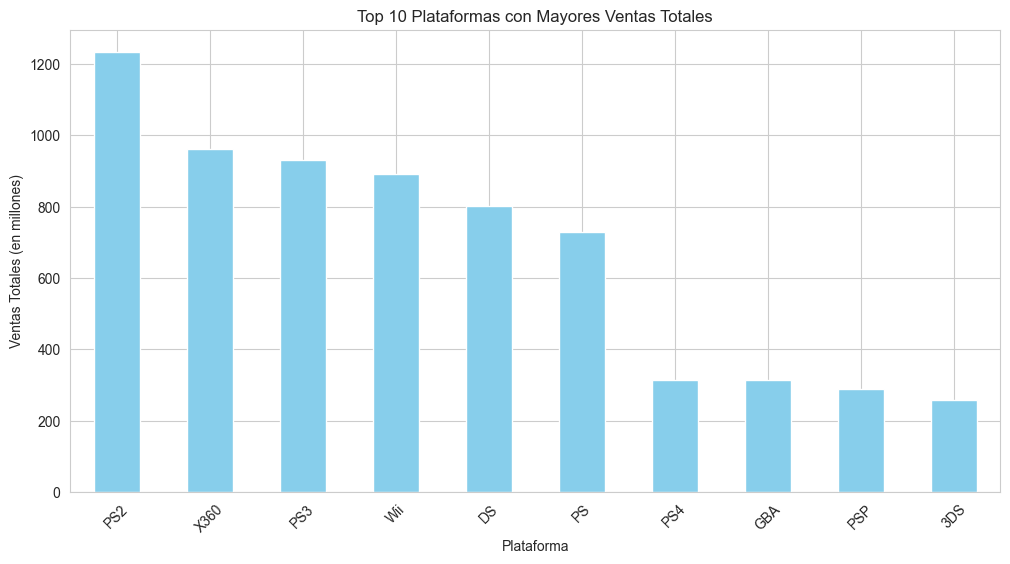

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [5]:
# Calcular las ventas totales por plataforma
total_sales_by_platform = games_data_cleaned.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualizar las 10 plataformas con mayores ventas totales
plt.figure(figsize=(12, 6))
total_sales_by_platform.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Plataformas con Mayores Ventas Totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.show()

total_sales_by_platform.head(10)


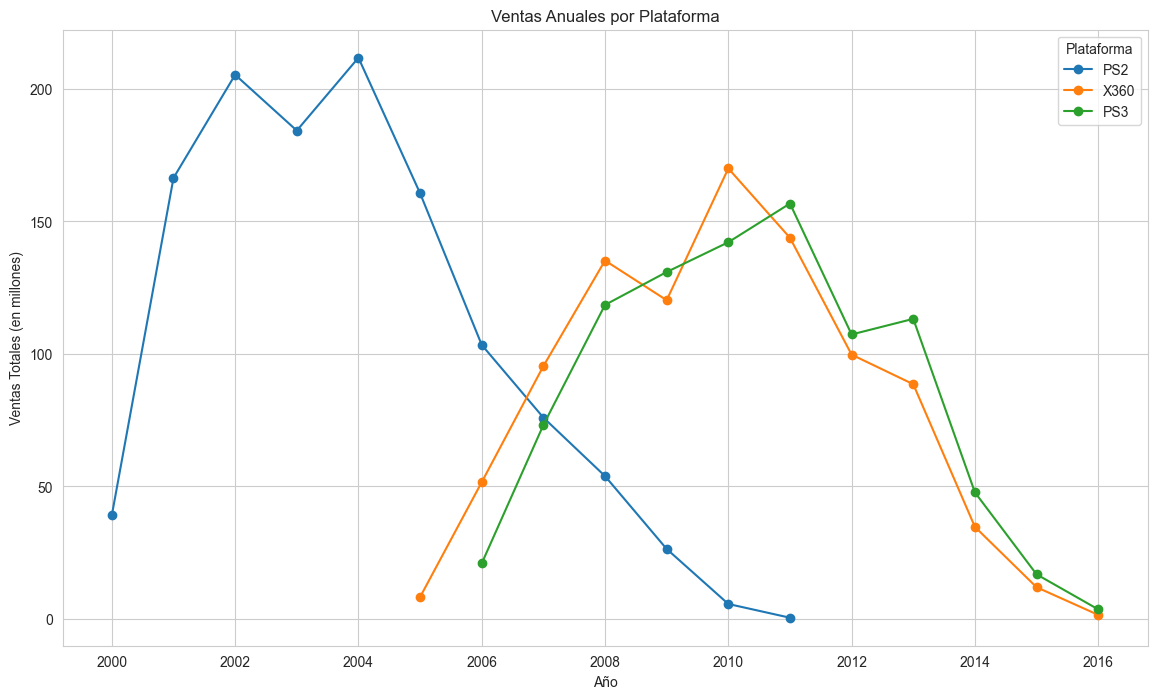

In [6]:
# Seleccionar plataformas para análisis detallado
selected_platforms = ['PS2', 'X360', 'PS3']

# Filtrar datos para incluir solo las plataformas seleccionadas
platform_sales_over_time = games_data_cleaned[games_data_cleaned['platform'].isin(selected_platforms)]

# Agrupar por plataforma y año de lanzamiento, y sumar las ventas totales
platform_sales_annual = platform_sales_over_time.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Crear gráficos de líneas para visualizar las ventas anuales por plataforma
plt.figure(figsize=(14, 8))
for platform in selected_platforms:
    plt.plot(platform_sales_annual.index, platform_sales_annual[platform], marker='o', label=platform)

plt.title('Ventas Anuales por Plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

